In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [39]:
data_games=pd.read_csv('/content/games.csv')

In [40]:
data_games.head(2)

,Unnamed: 0,Date,GAME_ID,GAMES_STATUS,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,0,2022-12-22,22200477,Final,1610612740,1610612759,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,1,2022-12-22,22200478,Final,1610612762,1610612764,2022,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1


In [41]:
data_games.shape

(26552, 20)

In [42]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26552 entries, 0 to 26551
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       26552 non-null  int64  
 1   Date             26552 non-null  object 
 2   GAME_ID          26552 non-null  int64  
 3   GAMES_STATUS     26552 non-null  object 
 4   HOME_TEAM_ID     26552 non-null  int64  
 5   VISITOR_TEAM_ID  26552 non-null  int64  
 6   SEASON           26552 non-null  int64  
 7   PTS_home         26552 non-null  float64
 8   FG_PCT_home      26552 non-null  float64
 9   FT_PCT_home      26552 non-null  float64
 10  FG3_PCT_home     26552 non-null  float64
 11  AST_home         26552 non-null  float64
 12  REB_home         26552 non-null  float64
 13  PTS_away         26552 non-null  float64
 14  FG_PCT_away      26552 non-null  float64
 15  FT_PCT_away      26552 non-null  float64
 16  FG3_PCT_away     26552 non-null  float64
 17  AST_away    

In [43]:
data_games.describe()

,Unnamed: 0,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,26552.000000,2.655200e+04,2.655200e+04,2.655200e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000
mean,13303.004934,2.179758e+07,1.610613e+09,1.610613e+09,2012.147861,103.455898,0.460735,0.760377,0.356023,22.823441,43.374284,100.639876,0.449732,0.758816,0.349489,21.496271,42.113249,0.589221
std,7699.502243,5.536391e+06,8.641202e+00,8.659568e+00,5.569599,13.283370,0.056676,0.100677,0.111164,5.193308,6.625769,13.435868,0.055551,0.103429,0.109441,5.160596,6.533039,0.491984
min,0.000000,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,6637.750000,2.070008e+07,1.610613e+09,1.610613e+09,2007.000000,94.000000,0.422000,0.697000,0.286000,19.000000,39.000000,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,13275.500000,2.120081e+07,1.610613e+09,1.610613e+09,2012.000000,103.000000,0.460000,0.765000,0.357000,23.000000,43.000000,100.000000,0.449000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,20012.250000,2.180007e+07,1.610613e+09,1.610613e+09,2017.000000,112.000000,0.500000,0.833000,0.429000,26.000000,48.000000,110.000000,0.487000,0.833000,0.419000,25.000000,46.000000,1.000000
max,26650.000000,5.210021e+07,1.610613e+09,1.610613e+09,2022.000000,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


In [44]:
data_games.isna().sum()

Unnamed: 0         0
Date               0
GAME_ID            0
GAMES_STATUS       0
HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
SEASON             0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
dtype: int64

In [45]:

# Rename columns with corrected names
data_games=data_games.rename(columns={'GAME_DATE_EST': 'Date', 'GAME_STATUS_TEXT': 'GAMES_STATUS'})

# Now, the columns should be renamed as expected


In [46]:
data_games= data_games.drop(columns=['TEAM_ID_home', 'TEAM_ID_away'])

KeyError: ignored

# Changing columns datatype

In [47]:
data_games['Date']= pd.to_datetime(data_games['Date'])

In [48]:
data_games

,Unnamed: 0,Date,GAME_ID,GAMES_STATUS,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,0,2022-12-22,22200477,Final,1610612740,1610612759,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,1,2022-12-22,22200478,Final,1610612762,1610612764,2022,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2,2022-12-21,22200466,Final,1610612739,1610612749,2022,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
3,3,2022-12-21,22200467,Final,1610612755,1610612765,2022,113.0,0.441,0.909,0.297,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1
4,4,2022-12-21,22200468,Final,1610612737,1610612741,2022,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26547,26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,93.0,0.419,0.821,0.421,24.0,50.0,87.0,0.366,0.643,0.375,17.0,43.0,1
26548,26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,81.0,0.338,0.719,0.381,18.0,40.0,85.0,0.411,0.636,0.267,17.0,47.0,0
26549,26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,98.0,0.448,0.682,0.500,29.0,45.0,95.0,0.387,0.659,0.500,19.0,43.0,1
26550,26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,99.0,0.440,0.771,0.333,21.0,30.0,94.0,0.469,0.725,0.385,18.0,45.0,1


In [49]:
# Adjusting the layout to accommodate 30 pie charts (for 30 teams)
# We'll use a layout of 6 rows and 5 columns.

# Selecting the first 30 teams for demonstration
selected_teams = grouped_games.head(30)

# Creating the subplots for the pie charts
fig, axes = plt.subplots(6, 5, figsize=(20, 24))  # Adjusted layout
axes = axes.flatten()  # Flattening the axes array for easy iteration

for i, (idx, row) in enumerate(selected_teams.iterrows()):
    # Data for pie chart
    labels = 'Wins', 'Losses'
    sizes = [row['W'], row['L']]

    # Plotting the pie chart
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Team ID: {row["TEAM_ID"]}')

# Hide any unused axes if there are less than 30 teams
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

NameError: ignored

In [50]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26552 entries, 0 to 26551
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       26552 non-null  int64         
 1   Date             26552 non-null  datetime64[ns]
 2   GAME_ID          26552 non-null  int64         
 3   GAMES_STATUS     26552 non-null  object        
 4   HOME_TEAM_ID     26552 non-null  int64         
 5   VISITOR_TEAM_ID  26552 non-null  int64         
 6   SEASON           26552 non-null  int64         
 7   PTS_home         26552 non-null  float64       
 8   FG_PCT_home      26552 non-null  float64       
 9   FT_PCT_home      26552 non-null  float64       
 10  FG3_PCT_home     26552 non-null  float64       
 11  AST_home         26552 non-null  float64       
 12  REB_home         26552 non-null  float64       
 13  PTS_away         26552 non-null  float64       
 14  FG_PCT_away      26552 non-null  float

In [51]:
data_games['GAME_ID'] = data_games['GAME_ID'].astype(str)
data_games['HOME_TEAM_ID'] = data_games['HOME_TEAM_ID'].astype(str)
data_games['VISITOR_TEAM_ID'] = data_games['VISITOR_TEAM_ID'].astype(str)

In [52]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26552 entries, 0 to 26551
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       26552 non-null  int64         
 1   Date             26552 non-null  datetime64[ns]
 2   GAME_ID          26552 non-null  object        
 3   GAMES_STATUS     26552 non-null  object        
 4   HOME_TEAM_ID     26552 non-null  object        
 5   VISITOR_TEAM_ID  26552 non-null  object        
 6   SEASON           26552 non-null  int64         
 7   PTS_home         26552 non-null  float64       
 8   FG_PCT_home      26552 non-null  float64       
 9   FT_PCT_home      26552 non-null  float64       
 10  FG3_PCT_home     26552 non-null  float64       
 11  AST_home         26552 non-null  float64       
 12  REB_home         26552 non-null  float64       
 13  PTS_away         26552 non-null  float64       
 14  FG_PCT_away      26552 non-null  float

In [53]:
data_games['SEASON'] = pd.to_datetime(data_games['SEASON'], format='%Y').dt.strftime('%Y')#.dt.strftime('%Y') then extracts only the year component in string format, effectively displaying the year while keeping it in a datetime-like object.

In [54]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26552 entries, 0 to 26551
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       26552 non-null  int64         
 1   Date             26552 non-null  datetime64[ns]
 2   GAME_ID          26552 non-null  object        
 3   GAMES_STATUS     26552 non-null  object        
 4   HOME_TEAM_ID     26552 non-null  object        
 5   VISITOR_TEAM_ID  26552 non-null  object        
 6   SEASON           26552 non-null  object        
 7   PTS_home         26552 non-null  float64       
 8   FG_PCT_home      26552 non-null  float64       
 9   FT_PCT_home      26552 non-null  float64       
 10  FG3_PCT_home     26552 non-null  float64       
 11  AST_home         26552 non-null  float64       
 12  REB_home         26552 non-null  float64       
 13  PTS_away         26552 non-null  float64       
 14  FG_PCT_away      26552 non-null  float

# NOW dealing with null values

In [55]:
data_games.isna().sum()

Unnamed: 0         0
Date               0
GAME_ID            0
GAMES_STATUS       0
HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
SEASON             0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
dtype: int64

In [56]:
data_games.dropna(inplace=True)

In [57]:
data_games.shape

(26552, 20)

In [58]:
data_games.to_csv('/content/games.csv')


# Data is Clean Now

# UNDERSTANDING DATASET

In [59]:
data_games.head()

,Unnamed: 0,Date,GAME_ID,GAMES_STATUS,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,0,2022-12-22,22200477,Final,1610612740,1610612759,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,1,2022-12-22,22200478,Final,1610612762,1610612764,2022,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2,2022-12-21,22200466,Final,1610612739,1610612749,2022,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
3,3,2022-12-21,22200467,Final,1610612755,1610612765,2022,113.0,0.441,0.909,0.297,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1
4,4,2022-12-21,22200468,Final,1610612737,1610612741,2022,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0


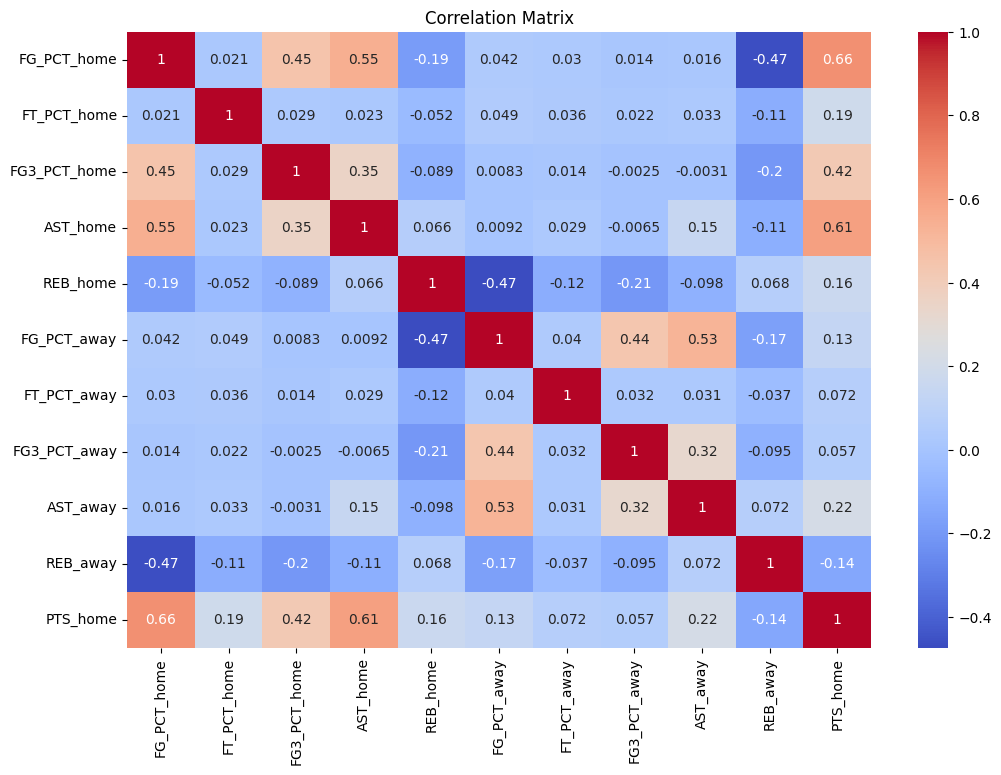

In [60]:
# Selecting potential predictors and the target variable (PTS_home)
predictors = ["FG_PCT_home", "FT_PCT_home", "FG3_PCT_home", "AST_home", "REB_home",
              "FG_PCT_away", "FT_PCT_away", "FG3_PCT_away", "AST_away", "REB_away"]
target = "PTS_home"

# Creating a new dataframe with just the selected columns
analysis_df = data_games[predictors + [target]]

# Calculating the correlation matrix
correlation_matrix = analysis_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Data Preparation

In [61]:
model_data=data_games[['PTS_home','FG3_PCT_home',"FG_PCT_home", "FG3_PCT_home", "AST_home"]]

In [62]:
model_data.head()

,PTS_home,FG3_PCT_home,FG_PCT_home,FG3_PCT_home,AST_home
0,126.0,0.382,0.484,0.382,25.0
1,120.0,0.457,0.488,0.457,16.0
2,114.0,0.313,0.482,0.313,22.0
3,113.0,0.297,0.441,0.297,27.0
4,108.0,0.378,0.429,0.378,22.0


In [63]:
features = model_data.drop('PTS_home', axis=1)
target = model_data['PTS_home']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 0.23368521,  0.41049671,  0.23368521,  0.41911635],
       [ 0.90837918,  0.48107452,  0.90837918, -1.31391584],
       [-0.38703325,  0.3752078 , -0.38703325, -0.15856105],
       ...,
       [ 1.29520373, -0.22470364,  1.29520373,  1.18935288],
       [-0.20711486, -0.36585927, -0.20711486, -0.35112018],
       [-0.20711486, -0.52465935, -0.20711486, -0.92879758]])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [66]:
# Building the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
model.coef_

array([-6.27539884e+13,  5.67968750e+00,  6.27539884e+13,  4.39453125e+00])

In [68]:
home_team_score_prediction= model.predict(X_test)
home_team_score_prediction_train= model.predict(X_train)

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculating metrics
mse = mean_squared_error(y_train,home_team_score_prediction_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train,home_team_score_prediction_train)
r2 = r2_score(y_train,home_team_score_prediction_train)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 82.8404549814592
Root Mean Squared Error: 9.101673196806134
Mean Absolute Error: 7.2341184646158805
R-squared: 0.5295797399452115


In [70]:
# Rounding predictions to the nearest integer
home_team_score_prediction = np.rint(home_team_score_prediction)

# If you want them as integers
home_team_score_prediction = home_team_score_prediction.astype(int)
pd.DataFrame(home_team_score_prediction,y_test).rename({'PTS_home':'Actual Data', 0:'Predicted Data'})

,0
PTS_home,
120.0,117
122.0,122
98.0,102
86.0,96
67.0,91
...,...
87.0,97
117.0,106
103.0,105


In [71]:
# Assuming 'home_team_score_prediction' is your array of predictions
# Rounding predictions to the nearest integer
home_team_score_prediction = np.rint(home_team_score_prediction)

# Converting to integers
home_team_score_prediction = home_team_score_prediction.astype(int)

# Creating a DataFrame for comparison
output_data = pd.DataFrame({
    'Actual Data': y_test,
    'Predicted Data': home_team_score_prediction
}).reset_index(drop=True)

# Displaying the DataFrame
output_data.head()

,Actual Data,Predicted Data
0,120.0,117
1,122.0,122
2,98.0,102
3,86.0,96
4,67.0,91


In [72]:

# Calculating metrics
mse = mean_squared_error(output_data['Actual Data'],output_data['Predicted Data'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(output_data['Actual Data'],output_data['Predicted Data'])
r2 = r2_score(output_data['Actual Data'],output_data['Predicted Data'])

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 82.25192995669366
Root Mean Squared Error: 9.06928497494117
Mean Absolute Error: 7.181698361890416
R-squared: 0.5372339084926872


In [73]:
for column in model_data.columns:
    if column != 'PTS_home':
        model_data[column + '_log'] = np.log(model_data[column] + 1)

# Displaying the transformed data
model_data.head()

ValueError: ignored

In [ ]:
#python
#Copy code
# Selecting the relevant columns from the data_games dataset
data = model_data[["FG_PCT_home_log", "FT_PCT_home_log", "FG3_PCT_home_log", "AST_home_log", "REB_home_log",
                   "FG_PCT_away_log", "FT_PCT_away_log", "FG3_PCT_away_log", "AST_away_log", "REB_away_log"]]



# Displaying the updated DataFrame
data.head()

,FG_PCT_home_log,FT_PCT_home_log,FG3_PCT_home_log,AST_home_log,REB_home_log,FG_PCT_away_log,FT_PCT_away_log,FG3_PCT_away_log,AST_away_log,REB_away_log
0,0.394741,0.655445,0.323532,3.258097,3.850148,0.390690,0.596085,0.278389,3.178054,3.806662
1,0.397433,0.668854,0.376380,2.833213,3.713572,0.445327,0.568151,0.287432,3.044522,3.637586
2,0.393393,0.579978,0.272315,3.135494,3.637586,0.385262,0.519984,0.359770,3.044522,3.850148
3,0.365337,0.646580,0.260054,3.332205,3.912023,0.330742,0.551007,0.231905,2.772589,3.850148
4,0.356975,0.693147,0.320633,3.135494,3.871201,0.405465,0.572673,0.256191,3.044522,3.871201


In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data, model_data['PTS_home'], test_size=0.2, random_state=42)

In [ ]:
# Building the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
home_team_score_prediction= model.predict(X_test)
home_team_score_prediction_train= model.predict(X_train)
# Assuming 'home_team_score_prediction' is your array of predictions
# Rounding predictions to the nearest integer
home_team_score_prediction = np.rint(home_team_score_prediction)

# Converting to integers
home_team_score_prediction = home_team_score_prediction.astype(int)

In [ ]:

# Creating a DataFrame for comparison
output_data = pd.DataFrame({
    'Actual Data': y_test,
    'Predicted Data': home_team_score_prediction
}).reset_index(drop=True)

# Displaying the DataFrame
output_data.head()


,Actual Data,Predicted Data
0,120.0,112
1,122.0,119
2,98.0,95
3,86.0,90
4,67.0,81


In [ ]:

# Calculating metrics
mse = mean_squared_error(output_data['Actual Data'],output_data['Predicted Data'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(output_data['Actual Data'],output_data['Predicted Data'])
r2 = r2_score(output_data['Actual Data'],output_data['Predicted Data'])

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 43.471662587083415
Root Mean Squared Error: 6.593304375431443
Mean Absolute Error: 5.208811899830541
R-squared: 0.7554195822840734
